# Data Collection

In [62]:
#necessary libaries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [63]:
#loading the data
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [64]:
#checking the shape of the dataframe
df.shape

(730, 16)

Dataframe has total 730 rows and 16 columns

In [65]:
#checking the dataframe dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [66]:
#checking the statistics part of the numerical columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##Detecting Null/missing and outliers

In [67]:
#checking if there is any null values
df.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [68]:
#checking if thre is any duplicate rows
df.duplicated().any()

False

In [69]:
#numerical columns
num_col=['temp','atemp','hum','windspeed']

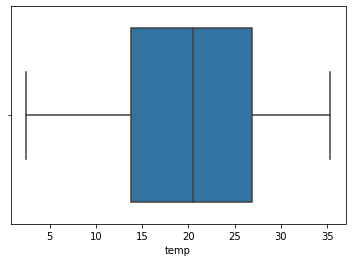

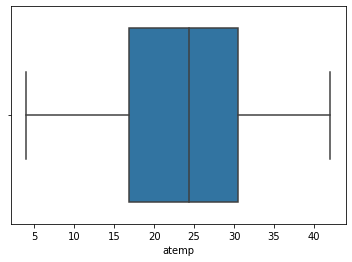

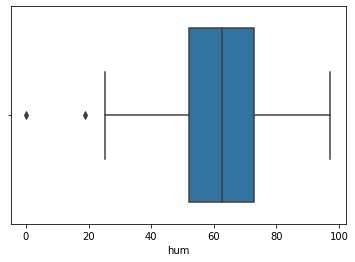

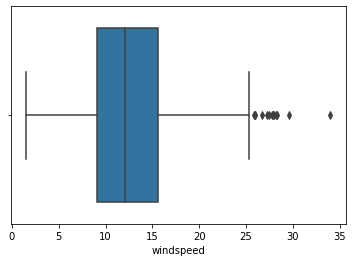

In [70]:
#checking for outliers
for i in num_col:
  sns.boxplot(df[i])
  plt.show()

In [71]:
#checking the statistical data of the numericals columns
df[num_col].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


**Insights:-**
1. Dataframe has 730 rows and 16 columns.
2. There is no null/missing values.
3. There is no duplicate rows.
4. There are many categorical variable that are marked as numerical.(season,mnth,weekday)
5. Windspeed and hum contains some outliers.
6. The difference between 75th percentile and maximum value is not much
7. Hence outlier can be neglected and kept as it is.

##Dropping irrelevant columns 

In [72]:
#dropping columns
df[['instant','dteday']].head()

,instant,dteday
0,1,01-01-2018
1,2,02-01-2018
2,3,03-01-2018
3,4,04-01-2018
4,5,05-01-2018


In [73]:
df['total']=df.casual+df.registered
df[['total','cnt']].corr()

,total,cnt
total,1.0,1.0
cnt,1.0,1.0


**Dropping columns:-**
1. instant -as it is a index column
2. dteday -as it is a date column but weekday,month and year is already provided hence it is not needed
3. casual,registered - cnt column is the sum of both casual and registered hence it is not needed . 

In [74]:
df.drop(columns=['instant','dteday','casual','registered','total'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##Converting the categorical columns into numerical

In [75]:
#checking the season values before changing them
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [76]:
#converting season column to categorical column for analysis
df['season']=df.season.replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
df.season.value_counts(normalize=True)*100

Fall      25.753425
Summer    25.205479
Spring    24.657534
Winter    24.383562
Name: season, dtype: float64

In [77]:
#checking the mnth values before changing them
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [78]:
#converting mnth column to categorical column for analysis 
df['mnth']=df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df.mnth.value_counts(normalize=True)*100

Jan    8.493151
Mar    8.493151
May    8.493151
Jul    8.493151
Aug    8.493151
Oct    8.493151
Dec    8.493151
Apr    8.219178
Jun    8.219178
Sep    8.219178
Nov    8.219178
Feb    7.671233
Name: mnth, dtype: float64

In [79]:
#checking the weekday values before changing them
df.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [80]:
#converting weekday column to categorical column for analysis 
df['weekday']=df.weekday.replace([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thur','Fri','Sat'])
df.weekday.value_counts(normalize=True)*100

Mon     14.383562
Tue     14.383562
Wed     14.246575
Thur    14.246575
Fri     14.246575
Sat     14.246575
Sun     14.246575
Name: weekday, dtype: float64

In [81]:
#checking the weathersit values before changing them
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [82]:
#converting weathersit column to categorical column for analysis 
df['weathersit']=df['weathersit'].replace([1,2,3,4],['Clear','Misty','Light_snow_rain','Heavy_snow_rain'])
df.weathersit.value_counts(normalize=True)*100

Clear              63.424658
Misty              33.698630
Light_snow_rain     2.876712
Name: weathersit, dtype: float64

In [83]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Performing EDA

In [84]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##Categorical Variable Analysis

In [85]:
cat=list(df.columns[0:7])
cat

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

###Univariate analysis of Categorical Variable

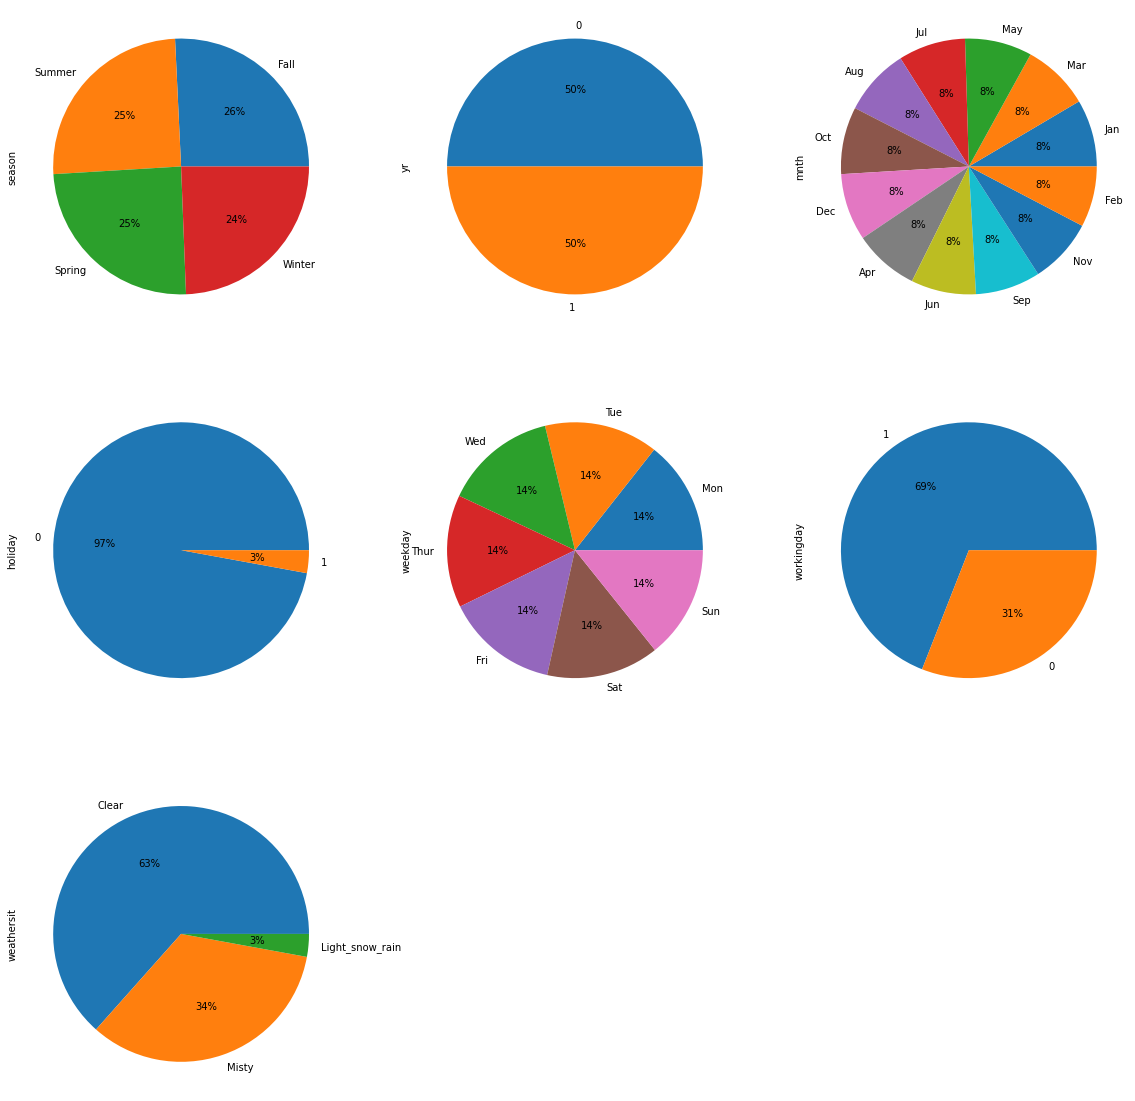

In [86]:
#Univariate analysis using pie chart
j=1
plt.figure(figsize=(20,20))
plt.title('Composition of Categorical Variable')
for i in cat:
  plt.subplot(3,3,j)
  df[i].value_counts(normalize=True).plot.pie(labels=df[i].value_counts(normalize=True).index,autopct='%1.0f%%')
  j+=1
plt.show()
  

**Insight:-**
1. Season , yr , mnth, weekday have more or less equal composition
2. Holiday , weathersit, workingday have a very large difference in composition 

###Bivariate analysis of categorical value

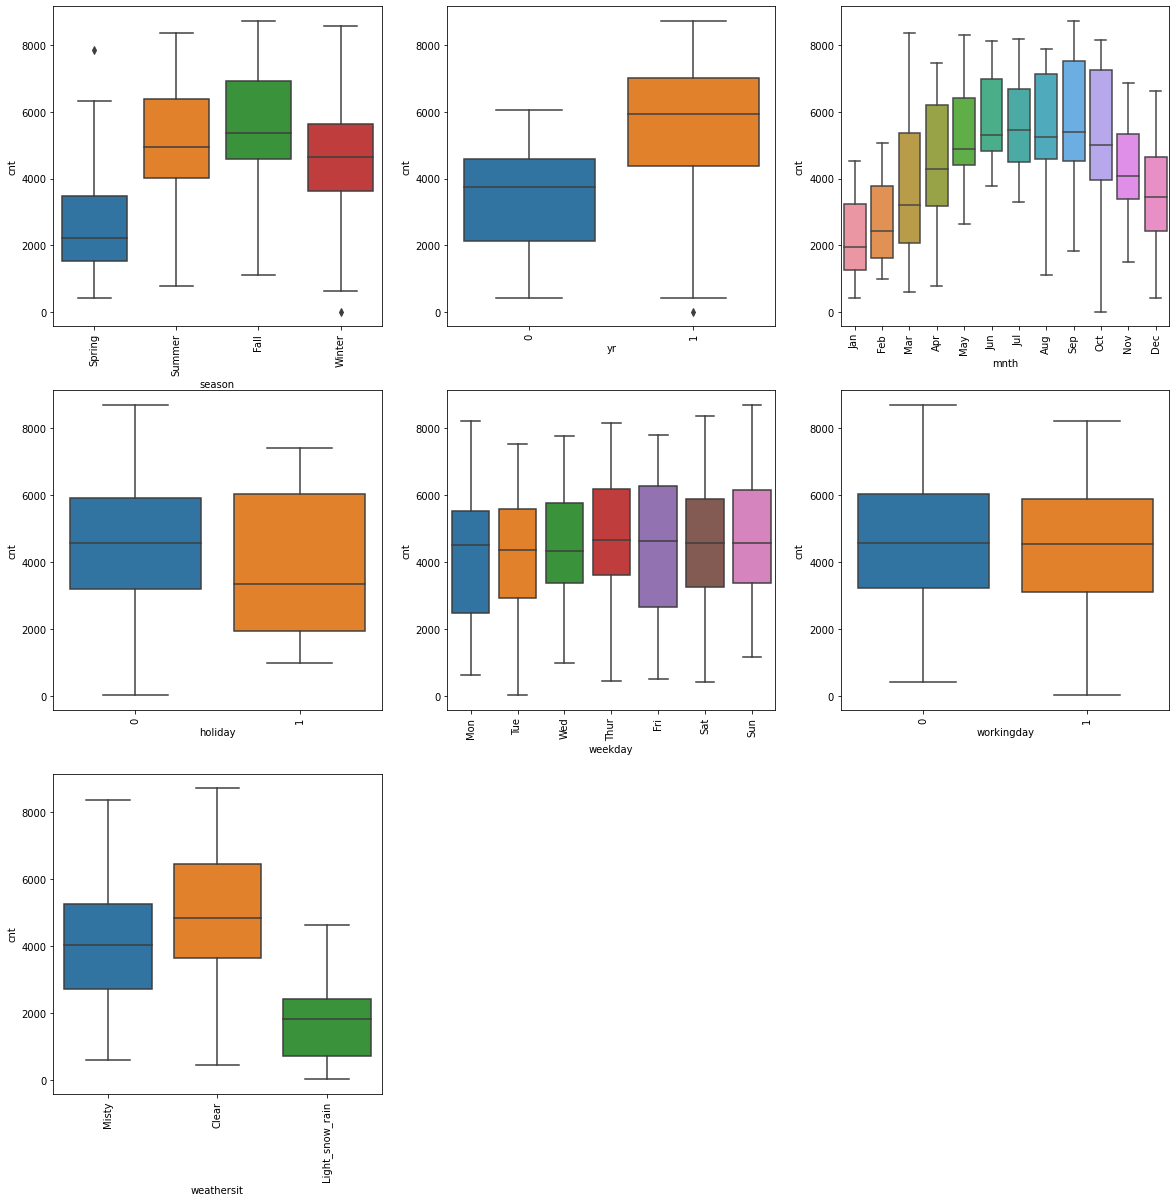

In [87]:
#Bivariate analysis using box plot
j=1
plt.figure(figsize=(20,20))
for i in cat:
  plt.subplot(3,3,j)
  sns.boxplot(x=i,y='cnt',data=df)
  plt.xticks(rotation = 90)
  j+=1
plt.show()

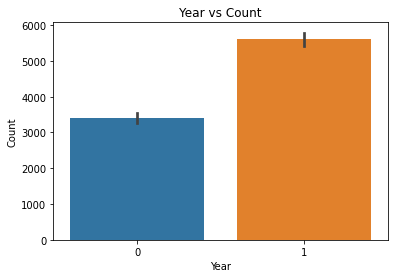

In [88]:
# year VS count
sns.barplot(x='yr',y='cnt',data=df)
plt.title('Year vs Count')
plt.xlabel('Year')
plt.ylabel('Count',)
plt.show()

In [89]:
#percentage increase
(df.groupby('yr')['cnt'].sum()/df['cnt'].sum())*100

yr
0    37.774584
1    62.225416
Name: cnt, dtype: float64

 **Insight:-** From year 2018 to 2019 the popularity of boom bikes has increased.

In [90]:
#creating a function for bivariate analysis to understand the effect of cnt with categorical variable and yr
def categorical_variable_analysis(i):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  sns.barplot(x=i,y='cnt',data=df)
  plt.subplot(1,2,2)
  sns.barplot(x=i,y='cnt',data=df,hue='yr')
  plt.show()


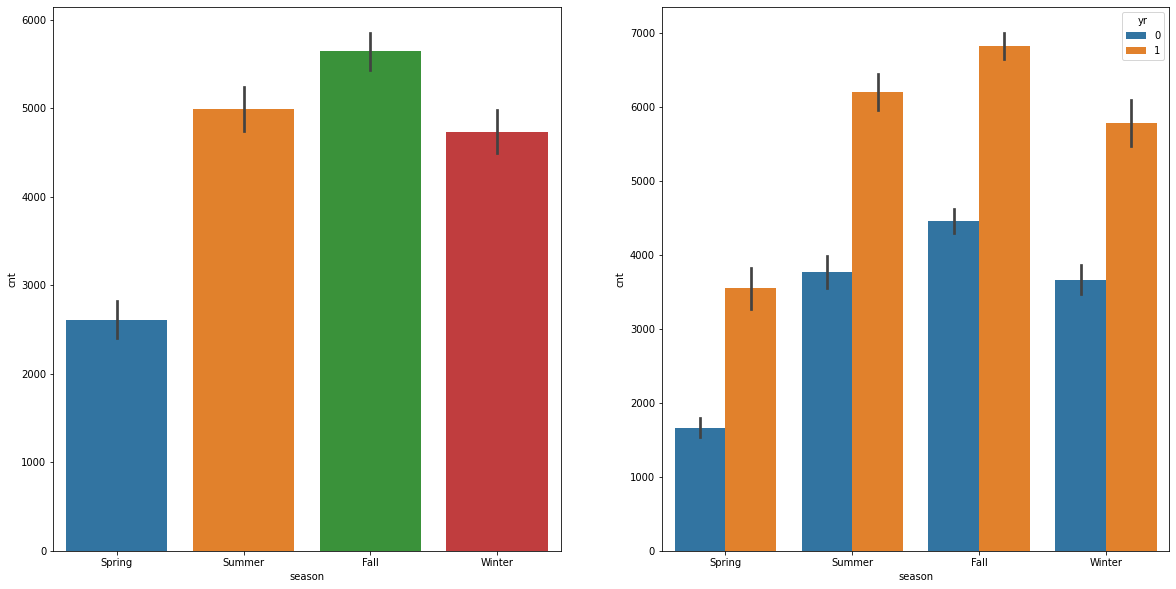

,sum,mean,count
season,,,
Fall,1061129,5644.303191,188
Summer,918589,4992.331522,184
Winter,841613,4728.162921,178
Spring,469514,2608.411111,180


In [91]:
#Season Vs Count
categorical_variable_analysis('season')
df.groupby('season')['cnt'].agg(['sum','mean','count']).sort_values(by='sum',ascending=False)                                          

**Insight:-** In the season Fall maximum bikes were rented followed by Summer and Winter and in Spring it was least rented.

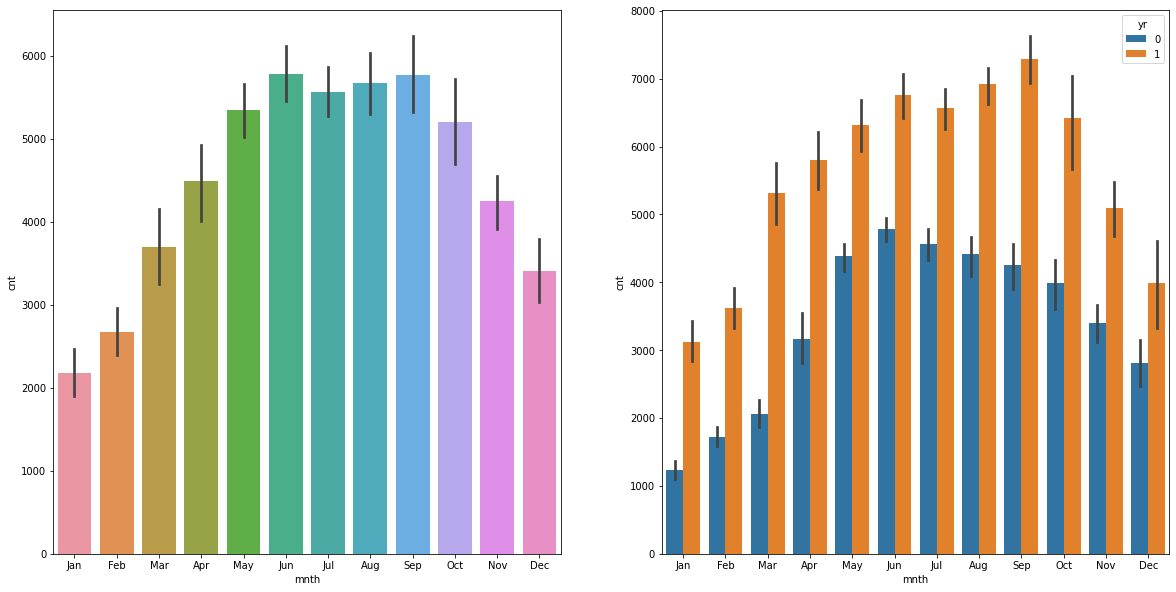

,sum,mean,count
mnth,,,
Aug,351194,5664.419355,62
Jun,346342,5772.366667,60
Sep,345991,5766.516667,60
Jul,344948,5563.677419,62
May,331686,5349.774194,62
Oct,322352,5199.225806,62
Apr,269094,4484.900000,60
Nov,254831,4247.183333,60
Mar,228920,3692.258065,62


In [92]:
#Month Vs Count
categorical_variable_analysis('mnth')
df.groupby('mnth')['cnt'].agg(['sum','mean','count']).sort_values(by='sum',ascending=False)                                          

**Insight:-** The demand of the bike is more in the month of May till October.

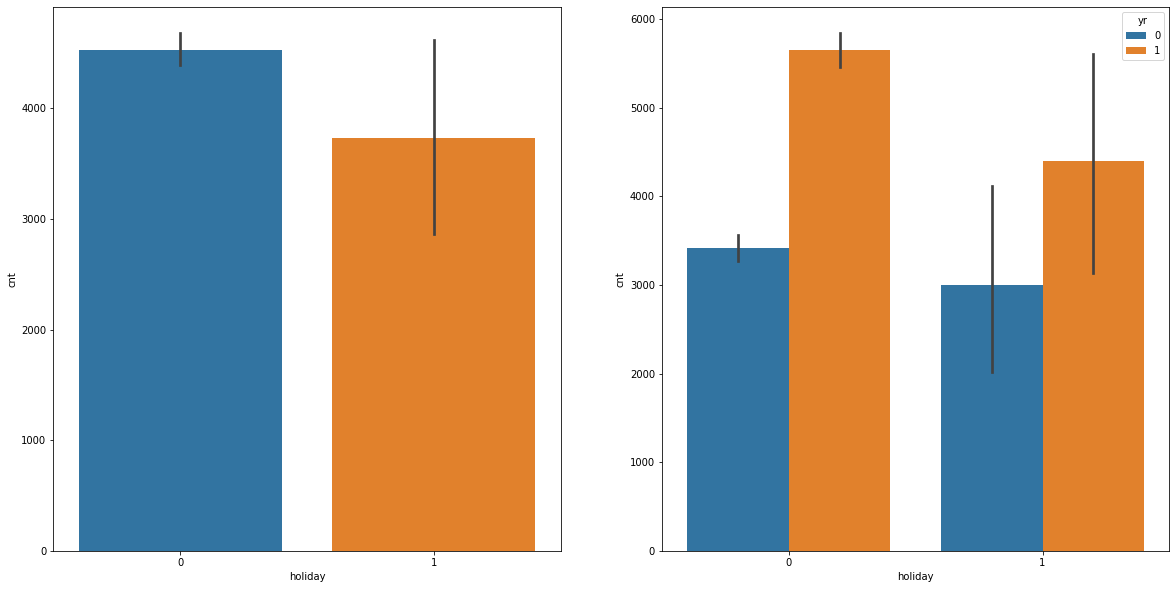

,sum,mean,count
holiday,,,
0,3212410,4530.90268,709
1,78435,3735.00000,21


In [93]:
#Holiday Vs Count
categorical_variable_analysis('holiday')
df.groupby('holiday')['cnt'].agg(['sum','mean','count']).sort_values(by='sum',ascending=False)                                          

**Insight:-**Maximum bike were rented when it is not a holiday

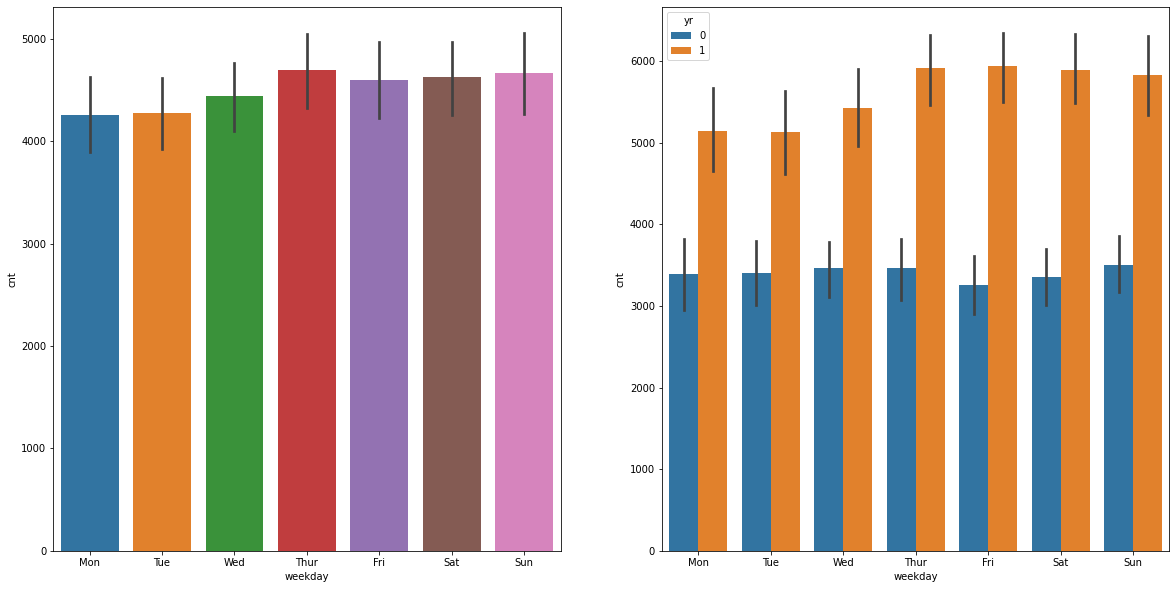

,sum,mean,count
weekday,,,
Thur,487923,4691.567308,104
Sun,485235,4665.721154,104
Sat,481176,4626.692308,104
Fri,478132,4597.423077,104
Wed,462276,4444.961538,104
Tue,448822,4274.495238,105
Mon,447281,4259.819048,105


In [94]:
#weekday Vs Count
categorical_variable_analysis('weekday')
df.groupby('weekday')['cnt'].agg(['sum','mean','count']).sort_values(by='sum',ascending=False)                                          

**Insight:-** There is small difference between weekdays and count. So it is hard to predict whihc day have the highest bikes rented.

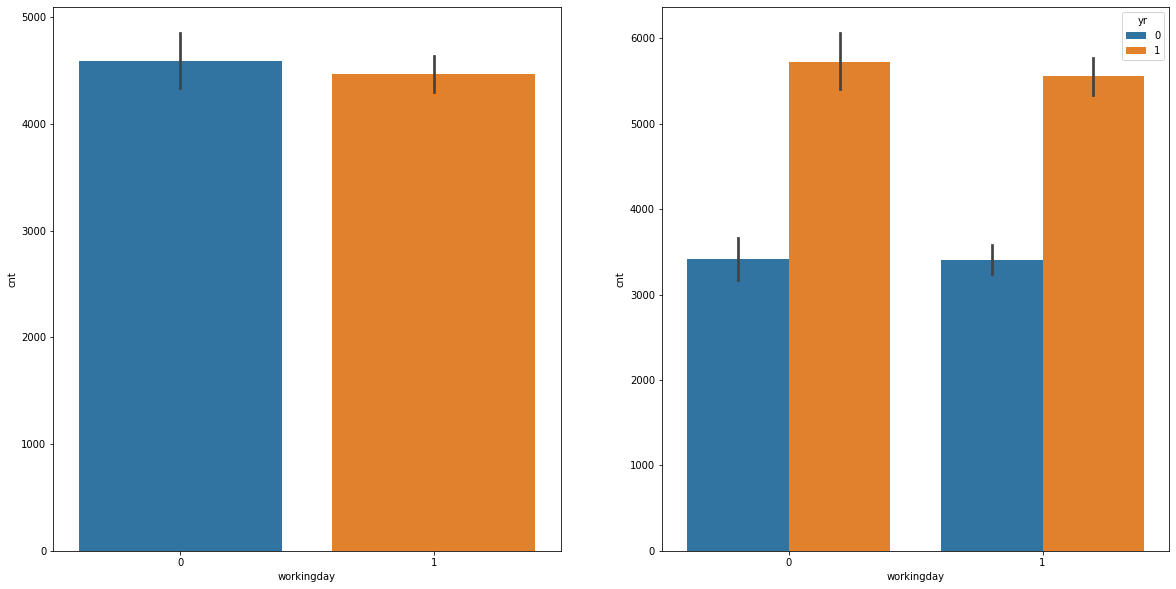

,sum,mean,count
workingday,,,
1,2253988,4472.198413,504
0,1036857,4587.862832,226


In [95]:
#workingday Vs Count
categorical_variable_analysis('workingday')
df.groupby('workingday')['cnt'].agg(['sum','mean','count']).sort_values(by='sum',ascending=False)                                          

**Insight:-** As the count of Working day(504) it is evident that more number of bikes were rented between working days.

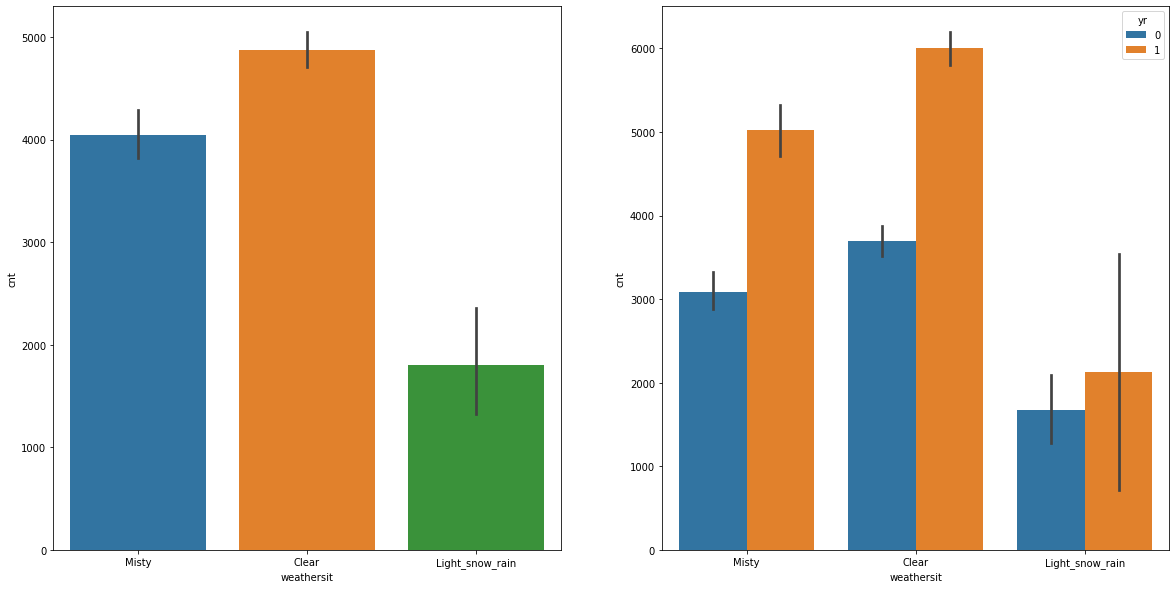

,sum,mean,count
weathersit,,,
Clear,2257952,4876.786177,463
Misty,995024,4044.813008,246
Light_snow_rain,37869,1803.285714,21


In [96]:
#weathersit Vs Count
categorical_variable_analysis('weathersit')
df.groupby('weathersit')['cnt'].agg(['sum','mean','count']).sort_values(by='sum',ascending=False)                                          

**Insight:-** Mamimum bikes were rented when the weather was Clear followed by Misty and very less bike were rented when it was Light snow or rain. Whereas no bikes were rented when it was heavy rain or snow .

###Numerical Variable Analysis

In [97]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [98]:
#separating numericals col
num=list(df.columns[7:])
num

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

<Figure size 720x1080 with 0 Axes>

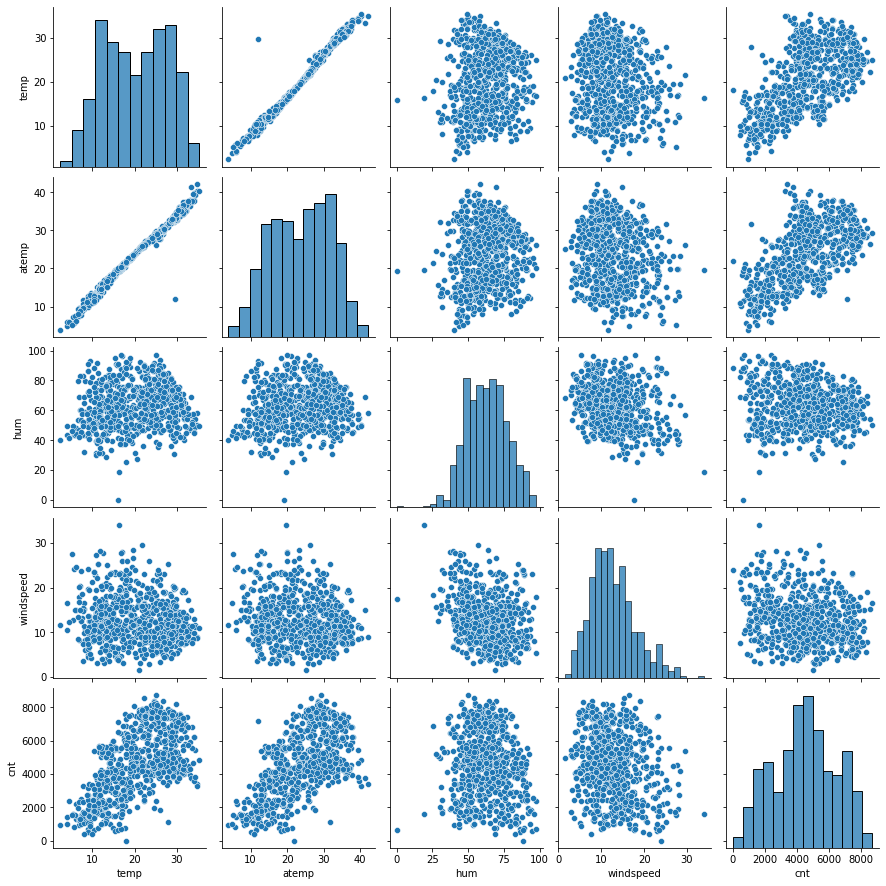

In [99]:
#Analysing cnt column with all the numerical variables
plt.figure(figsize=(10,15))
sns.pairplot(data=df[num])
plt.show()

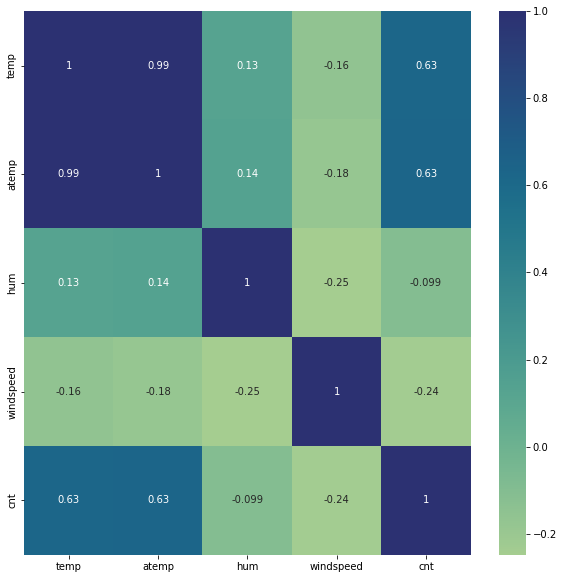

In [100]:
#using heatmap to understand the correlation between numericals variable
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(),annot=True,cmap='crest')
plt.show()

**Insight:-** 
1. There is some linear relationship of cnt with temp and atemp. 
2. temp and atemp are highly co releated.
3. There is negative and small co relation of cnt with hum and windspeed.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x720 with 0 Axes>

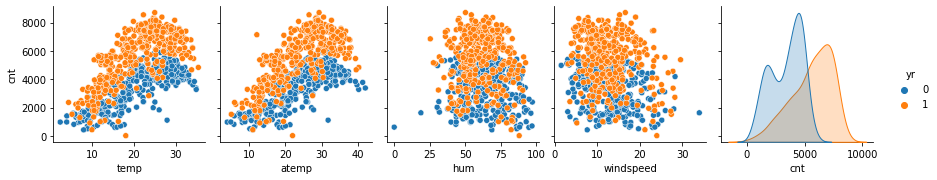

In [101]:
#using pairplot to understand the effect of year over numerical variables
plt.figure(figsize=(10,10))
sns.pairplot(x_vars=num,y_vars='cnt',data=df,hue='yr')
plt.show

**Insight:-**
1. There is increase in number of data in the year 2019 as comapred to 2018.Hence year good predictor.

#Data Prepartion

##Dummy variable preparation

In [102]:
#creating dummy variable for season
season = pd.get_dummies(data=df['season'])
season.drop(columns=['Spring'],axis=1,inplace=True)
season.head()


,Fall,Summer,Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


**Insight:-** Dropping Spring column as it has small count of bike rented and making it a base for building the model.


 

In [103]:
#creating dummy variable for season
month=pd.get_dummies(data=df['mnth'],drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [104]:
#creating dummy variable for weekday
weekday=pd.get_dummies(data=df['weekday'],drop_first=True)
weekday.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [105]:
#creating dummy variable for weathersit
weathersit=pd.get_dummies(data=df['weathersit'],drop_first=True)
weathersit.head()

,Light_snow_rain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [106]:
#merging the dataframe with dummy variable dataframes
df1=pd.concat([df,season,month,weekday,weathersit],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_snow_rain,Misty
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [107]:
#dropping the columns which are not needed
df1.drop(columns=['season','mnth','weekday','weathersit'],axis=1,inplace=True)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_snow_rain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#checking the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Fall             730 non-null    uint8  
 9   Summer           730 non-null    uint8  
 10  Winter           730 non-null    uint8  
 11  Aug              730 non-null    uint8  
 12  Dec              730 non-null    uint8  
 13  Feb              730 non-null    uint8  
 14  Jan              730 non-null    uint8  
 15  Jul              730 non-null    uint8  
 16  Jun              730 non-null    uint8  
 17  Mar             

##Spliting the data 

In [109]:
#Splitting data into train and test set by 7:3 ratio
train_df,test_df=train_test_split(df1,train_size=0.7,random_state=100)

In [110]:
#train set
train_df.shape

(510, 30)

In [111]:
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_snow_rain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,1,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,1


In [112]:
#test set
test_df.shape

(220, 30)

In [113]:
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_snow_rain,Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,1,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


##rescaling 

In [114]:
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_snow_rain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,1,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,1


In [115]:
#normalizing the numericals variable
scaler=MinMaxScaler()

#numericals variable
num = ['temp','atemp','hum','windspeed','cnt']

train_df[num].head()

,temp,atemp,hum,windspeed,cnt
576,29.246653,33.1448,70.4167,11.083475,7216
426,16.980847,20.6746,62.1250,10.792293,4066
728,10.489153,11.5850,48.3333,23.500518,1796
482,15.443347,18.8752,48.9583,8.708325,4220
111,13.803347,16.0977,72.9583,14.707907,1683


In [116]:
# rescaling the numericals columns and getting them in a common range for model building
train_df[num]=scaler.fit_transform(train_df[num])
train_df[num].head()

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [117]:
train_df[num].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


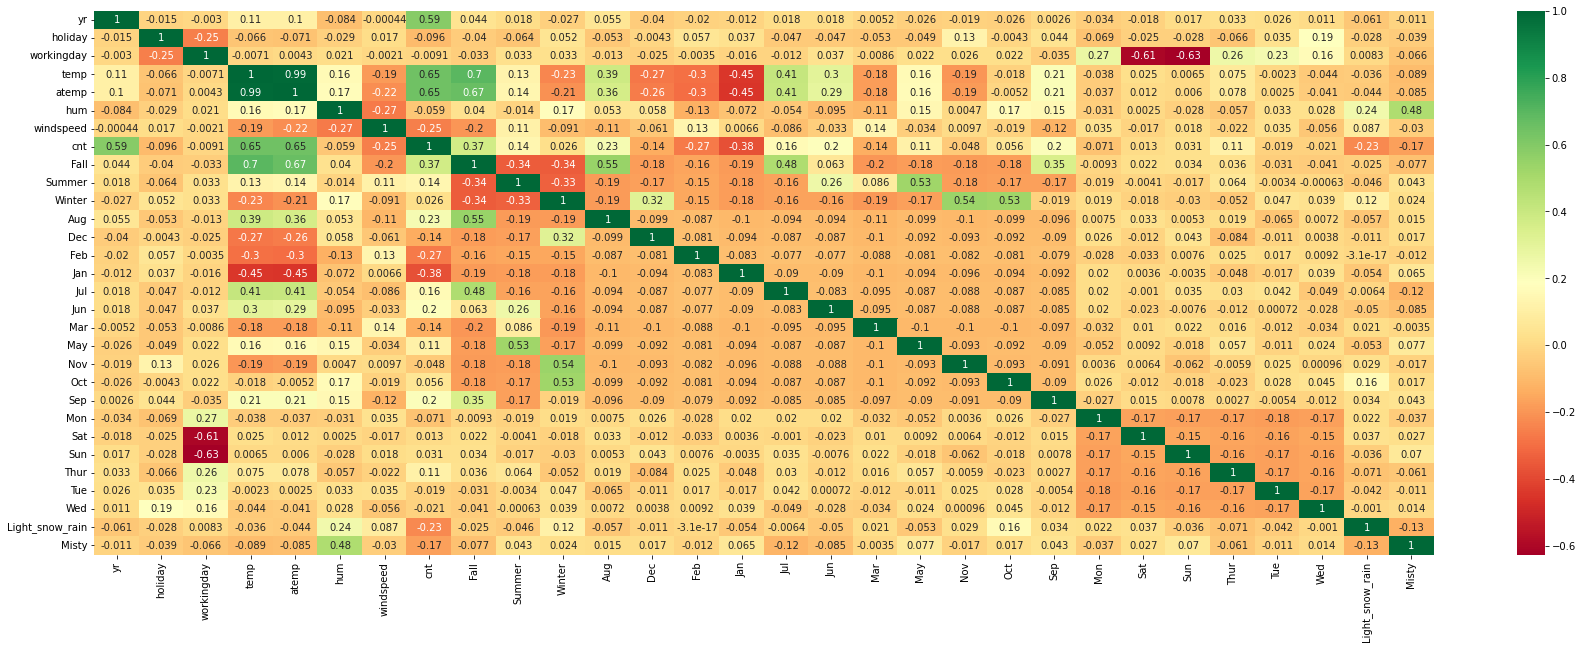

In [118]:
# checking the overall correlation among the variable
plt.figure(figsize=(30,10))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

#Building the model

##Feature Selection through VFE

In [119]:
#separating the target and independent variables
y_train=train_df.pop('cnt')
X_train=train_df

In [120]:
#target variable
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [121]:
#independent variables
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Fall,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_snow_rain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [122]:
#Running RFE with 15 variable 
lm = LinearRegression()
lm.fit(X_train, y_train)

#running rfe
rfe = RFE(lm,step=15)
rfe=rfe.fit(X_train,y_train)

In [123]:
#list of columns 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Fall', False, 2),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', False, 2),
 ('Thur', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Light_snow_rain', True, 1),
 ('Misty', True, 1)]

In [125]:
#important columns selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Summer', 'Winter', 'Jan', 'Sep', 'Sat', 'Light_snow_rain', 'Misty'],
      dtype='object')

In [124]:
# less important columns
X_train.columns[~rfe.support_]

Index(['Fall', 'Aug', 'Dec', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [126]:
#function to calculate VIF

def VIF_cal(X_train_rfe):
  vif=pd.DataFrame()
  X=X_train_rfe
  vif['Feature']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF']=round(vif['VIF'],2)
  vif.sort_values(by='VIF' ,ascending=False,inplace=True)
  return vif

In [127]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Summer,Winter,Jan,Sep,Sat,Light_snow_rain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,0,1


## First Model

In [128]:
#adding a constant
X_train_sm =sm.add_constant(X_train_rfe)

# create first model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary
print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          7.72e-187
Time:                        14:19:36   Log-Likelihood:                 506.73
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     495   BIC:                            -920.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2600      0.030     

In [129]:
VIF_cal(X_train_rfe)

,Feature,VIF
4,atemp,362.20
3,temp,353.75
5,hum,21.47
2,workingday,5.72
6,windspeed,3.89
13,Misty,2.23
0,yr,2.04
8,Winter,1.99
11,Sat,1.81
7,Summer,1.74


**Insight :-** atemp has the highest VIF followed by temp , atemp also has the highest p-value so will drop atemp first.

##Second Model

In [130]:
# dropping atemp as it has high p value and VIF
X_train_rfe.drop(columns='atemp',axis=1,inplace=True)
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,Summer,Winter,Jan,Sep,Sat,Light_snow_rain,Misty
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1


In [131]:
#adding a constant
X_train_sm2 =sm.add_constant(X_train_rfe)

# create second model
lr2=sm.OLS(y_train,X_train_sm2)

#fit
lr_model2=lr2.fit()

#summary
print(lr_model2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.52e-188
Time:                        14:20:49   Log-Likelihood:                 506.70
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     496   BIC:                            -926.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2594      0.030     

In [132]:
VIF_cal(X_train_rfe)

,Feature,VIF
4,hum,21.06
3,temp,10.16
2,workingday,5.72
5,windspeed,3.77
12,Misty,2.22
0,yr,2.04
7,Winter,1.95
10,Sat,1.81
6,Summer,1.70
8,Jan,1.56


**Insight :-** hum has the highest VIF so will drop hum first.

##Third Model

In [133]:
# dropping winter as it has high p value and VIF
X_train_rfe.drop(columns='hum',axis=1,inplace=True)
X_train_rfe.head()

,yr,holiday,workingday,temp,windspeed,Summer,Winter,Jan,Sep,Sat,Light_snow_rain,Misty
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.380981,1,0,0,0,0,0,1


In [134]:
#adding a constant
X_train_sm3 =sm.add_constant(X_train_rfe)

# create third model
lr3=sm.OLS(y_train,X_train_sm3)

#fit
lr_model3=lr3.fit()

#summary
print(lr_model3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.60e-185
Time:                        14:22:29   Log-Likelihood:                 497.23
No. Observations:                 510   AIC:                            -968.5
Df Residuals:                     497   BIC:                            -913.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1715      0.022     

In [135]:
VIF_cal(X_train_rfe)

,Feature,VIF
3,temp,5.34
2,workingday,4.91
4,windspeed,3.66
0,yr,2.04
9,Sat,1.70
5,Summer,1.65
6,Winter,1.58
11,Misty,1.53
7,Jan,1.33
8,Sep,1.21


**Insight :-** The p-value of the working day is more than 0.05 so will drop working day , temp has also high VIF but it is a important variable so we will keep it

##Fourth Model

In [136]:
X_train_rfe.drop(columns='workingday',axis=1,inplace=True)
X_train_rfe.head()

,yr,holiday,temp,windspeed,Summer,Winter,Jan,Sep,Sat,Light_snow_rain,Misty
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,0,1
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0,0,1
111,0,0,0.345824,0.380981,1,0,0,0,0,0,1


In [137]:
#adding a constant
X_train_sm4 =sm.add_constant(X_train_rfe)

# create fourth model
lr4=sm.OLS(y_train,X_train_sm4)

#fit
lr_model4=lr4.fit()

#summary
print(lr_model4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.77e-185
Time:                        14:26:04   Log-Likelihood:                 495.14
No. Observations:                 510   AIC:                            -966.3
Df Residuals:                     498   BIC:                            -915.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1506      0.020     

In [138]:
VIF_cal(X_train_rfe)

,Feature,VIF
2,temp,3.84
3,windspeed,3.31
0,yr,2.04
4,Summer,1.62
10,Misty,1.53
5,Winter,1.42
6,Jan,1.22
7,Sep,1.21
8,Sat,1.15
9,Light_snow_rain,1.08


**Insight:-** Sat has the high p-value so we will drop it

##Fifth Model

In [139]:
X_train_rfe.drop(columns='Sat',axis=1,inplace=True)
X_train_rfe.head()

,yr,holiday,temp,windspeed,Summer,Winter,Jan,Sep,Light_snow_rain,Misty
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,1
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0,1
111,0,0,0.345824,0.380981,1,0,0,0,0,1


In [140]:
#adding a constant
X_train_sm5 =sm.add_constant(X_train_rfe)

# create fifth model
lr5=sm.OLS(y_train,X_train_sm5)

#fit
lr_model5=lr5.fit()

#summary
print(lr_model5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.06e-186
Time:                        14:28:20   Log-Likelihood:                 494.49
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     499   BIC:                            -920.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1522      0.020     

In [141]:
VIF_cal(X_train_rfe)

,Feature,VIF
2,temp,3.77
3,windspeed,3.31
0,yr,2.04
4,Summer,1.62
9,Misty,1.53
5,Winter,1.42
6,Jan,1.21
7,Sep,1.21
8,Light_snow_rain,1.08
1,holiday,1.04


**Insight:-** Jan has the high p-value so we will drop it

##Sixth Model

In [142]:
X_train_rfe.drop(columns='Jan',axis=1,inplace=True)
X_train_rfe.head()

,yr,holiday,temp,windspeed,Summer,Winter,Sep,Light_snow_rain,Misty
576,1,0,0.815169,0.264686,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1
728,1,0,0.245101,0.663106,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1
111,0,0,0.345824,0.380981,1,0,0,0,1


In [143]:
#adding a constant
X_train_sm6 =sm.add_constant(X_train_rfe)

# create sixth model
lr6=sm.OLS(y_train,X_train_sm6)

#fit
lr_model6=lr6.fit()

#summary
print(lr_model6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.83e-186
Time:                        14:29:46   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017     

In [144]:
VIF_cal(X_train_rfe)

,Feature,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,Summer,1.57
8,Misty,1.48
5,Winter,1.37
6,Sep,1.20
7,Light_snow_rain,1.08
1,holiday,1.04


**Insight:-** So we will consider lr_model6 as the final model as it has p-value of less hence all the variable are of significant and the VIF of all the variable is less than 5 hence multicollinearity does not exsist

#Model Evaluation

In [145]:
print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.83e-186
Time:                        14:33:31   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017     

**Insight:-**
1. As all the value of the coefficient are non zero and p value is zero hence all the variable are significant.
2. R squared is 83 percent which is good (i.e 83 percent of the variance is explained by the model)
3. F-statistic is high and the prob(F-statistic) is very low hence the model is significant

**cnt** = 0.1259 + 0.2329 * yr - 0.0987 * holiday + 0.5480 * temp - 0.1532 * windspeed + 0.0881 * Summer +0.1293 * winter +  0.1012 * Sep - 0.2829 * light_snow_rain - 0.0784 * misty

## Verifying the assumption of linear equation.

In [146]:
# predicting y train and analysing residual
y_train_pred = lr_model6.predict(X_train_sm6)
residual = y_train - y_train_pred

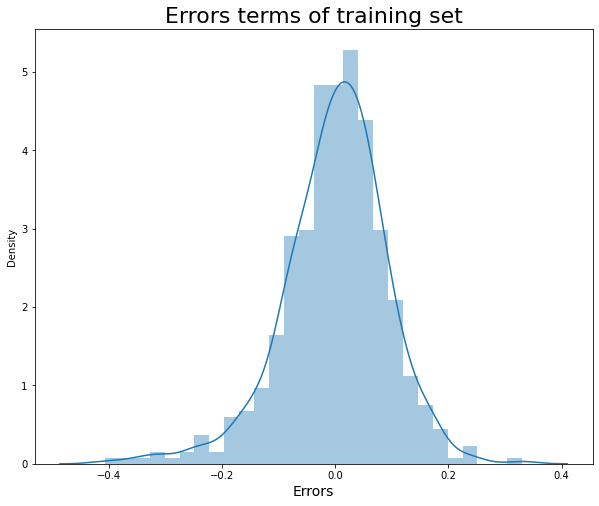

In [147]:
#Checking the error terms
plt.figure(figsize=(10,8))
sns.distplot(residual)
plt.title('Errors terms of training set', fontsize = 22)                  
plt.xlabel('Errors', fontsize = 14)
plt.show()

**Insight:-** Error terms are normally distributed

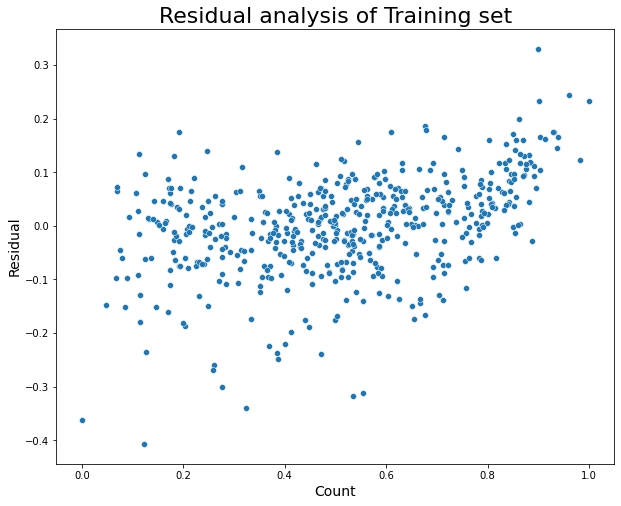

In [148]:
#checking for homoscedacity
plt.figure(figsize=(10,8))
sns.scatterplot(y_train,residual)
plt.title('Residual analysis of Training set',fontsize = 22)
plt.xlabel('Count',fontsize = 14)
plt.ylabel('Residual',fontsize = 14)
plt.show()

**Insight:-** There is no presence of visible pattern in residual values, hence homoscedacity is well preserved.

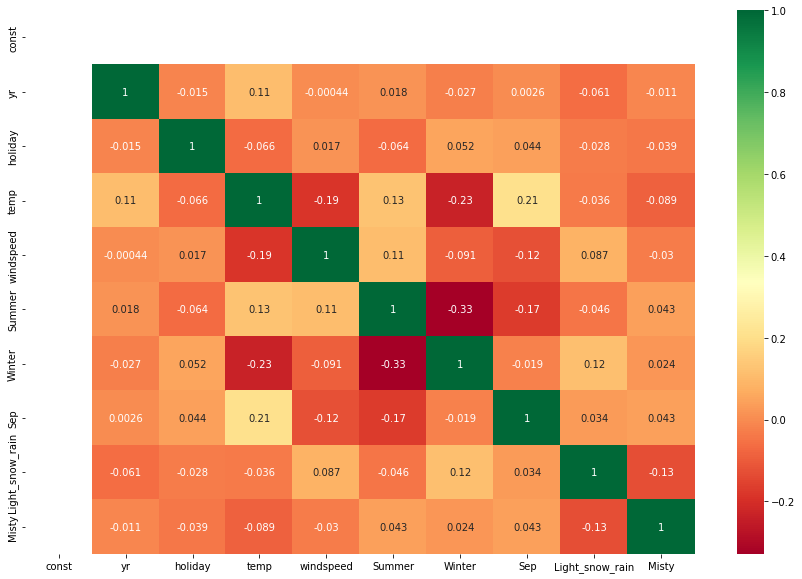

In [149]:
#checking for multicollinearity
plt.figure(figsize=(15,10))
sns.heatmap(X_train_sm6.corr(),annot=True,cmap='RdYlGn')
plt.show()

**Insight:-** There is no multicollinearity in the variable

In [150]:
VIF_cal(X_train_rfe)

,Feature,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,Summer,1.57
8,Misty,1.48
5,Winter,1.37
6,Sep,1.20
7,Light_snow_rain,1.08
1,holiday,1.04


**Insight:-** All the variable has VIF less than 5.

#Making Predication

In [151]:
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_snow_rain,Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,1,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [152]:
# rescaling test data set
num_var=['temp','atemp','hum','windspeed','cnt']

#transforming test data
test_df[num]=scaler.transform(test_df[num])

test_df[num].head()


,temp,atemp,hum,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029


In [153]:
#checking the statistical part and min max value of the test data set
test_df[num].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


In [154]:
#dividing data into x and y
y_test=test_df.pop('cnt')
X_test=test_df


In [155]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [156]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Fall,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_snow_rain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,1,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [157]:
#dropping irrelevant columns

#taking the relevant columns from the last model
col_test=list(X_train_sm6.columns)
col_test.remove('const')
#dropping the columns which are not needed
X_test=X_test[col_test]

#adding constant
X_test=sm.add_constant(X_test)


In [158]:
X_test.head()

,const,yr,holiday,temp,windspeed,Summer,Winter,Sep,Light_snow_rain,Misty
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [159]:
#making predication on y_test
y_test_pred=lr_model6.predict(X_test)

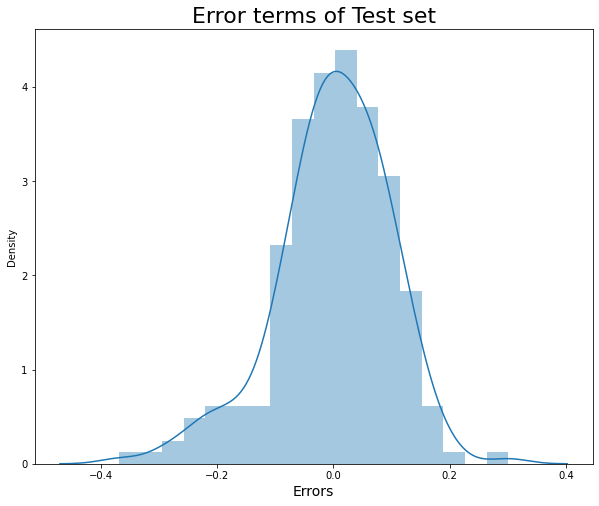

In [160]:
#checking if the error terms are normally distributed 
plt.figure(figsize=(10,8))
residul_test= y_test - y_test_pred
plt.title('Error terms of Test set', fontsize=22) 
sns.distplot(residul_test)
plt.xlabel('Errors', fontsize = 14)
plt.show()



**Insight:-** The error terms are normally distributed.

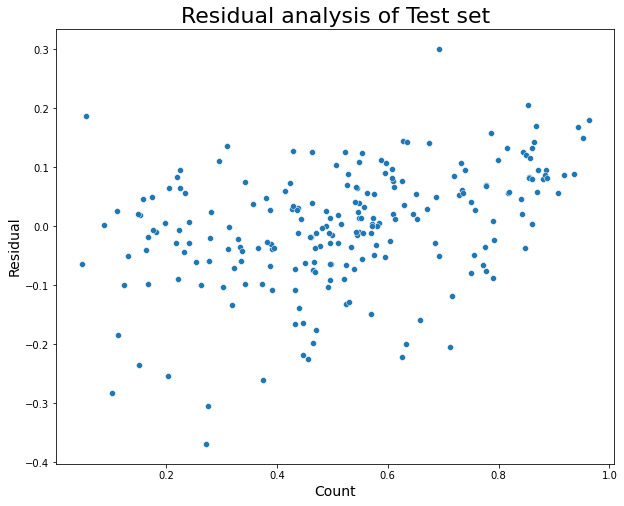

In [161]:
#checking for homoscedacity
plt.figure(figsize=(10,8))
sns.scatterplot(y_test,residul_test)
plt.title('Residual analysis of Test set',fontsize = 22)
plt.xlabel('Count',fontsize = 14)
plt.ylabel('Residual',fontsize = 14)
plt.show()

**Insight:-** There is presence of visible pattern in residual values,

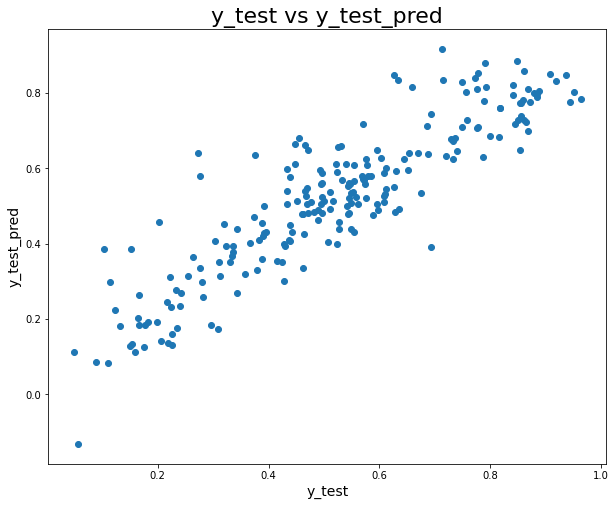

In [162]:
#checking the linear relationship
plt.figure(figsize=(10,8))
plt.title('y_test vs y_test_pred',fontsize = 22)
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_test_pred',fontsize = 14)
plt.show()

**Insight:-** There is a linear relationship between y_test and y_test_pred hence the model fit is not by chance.

In [163]:
#calculating r_square of the train and test data set
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)
r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)

In [164]:
print('R_squared of Training set = ',round(r2_train,3))
print('R_squared of Test set = ',round(r2_test,3))

R_squared of Training set =  0.83
R_squared of Test set =  0.794


In [165]:
# sample test size
siz =X_test.shape[0]  

# Number of independent variable
prdic = X_test.shape[1]  

# Adjusted R-Squared for test dataset
r2_test_adj = round((1-((1-r2_test)*(siz-1)/(siz-prdic-1))),3)

print('Adj. R-Squared for Test dataset: ', r2_test_adj)

Adj. R-Squared for Test dataset:  0.784


In [166]:
# r_square and adjusted r_square
print('R_squared of Training set = ',round(r2_train,3))
print('Adj. R-Squared for Training dataset: ', round(lr_model6.rsquared_adj,3))
print()
print('R_squared of Test set = ',round(r2_test,3))
print('Adj. R-Squared for Test dataset: ', r2_test_adj)

R_squared of Training set =  0.83
Adj. R-Squared for Training dataset:  0.827

R_squared of Test set =  0.794
Adj. R-Squared for Test dataset:  0.784


In [167]:
# Calculatiing Mean Sqare Error for test set
mean_sq_er = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mean_sq_er,4))

Mean_Squared_Error : 0.0098


**Insight:-** The Model is abel to predict the variance of the test set by 79 percent for the demand of bike.

**CONCLUSION:-** 

Final Equation:- **cnt** = 0.1259 + 0.2329 * yr - 0.0987 * holiday + 0.5480 * temp - 0.1532 * windspeed + 0.0881 * Summer +0.1293 * winter +  0.1012 * Sep - 0.2829 * light_snow_rain - 0.0784 * misty

while predicting 
1. temp
2. weathersit
3. yr
These variable should be given importance to have maximum demand for the bikes
